# In this tutorial, I will use Twitter data to compare the popularity of 3 Uganda Presidential Candidates: Museveni, Besigye and Mbabazi

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
#Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

In [4]:
#Variables that contains the user credentials to access Twitter API 
access_token = "4705823842-fMj5v0eb80I1v2EcIqm1hs6MU7gonlSBYaRxuzX"
access_token_secret = "jTWJNrS7lNJSCzV0P2ujzeF2odJwBvcKeccFovWWx4f5D"
consumer_key = "sAtmkJ5TkaSIKddjKS3CMZmZ5"
consumer_secret = "XjInymQZu6EZ1B8D3fNkvftLHeLdfqkzMZQATkAIljUBIiijaX"


#This is a basic listener that just prints received tweets to stdout.
class StdOutListener(StreamListener):

    def on_data(self, data):
        print(data)
        return True

    def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['museveni', 'besigye', 'mbabazi'])

{"created_at":"Wed Jun 29 06:21:47 +0000 2016","id":748038738190700545,"id_str":"748038738190700545","text":"RT @nbstv: Besigye: I am extremely disturbed by the delayed investigations in this case. If they have any case --which I doubt -- let them\u2026","source":"\u003ca href=\"http:\/\/www.twitter.com\" rel=\"nofollow\"\u003eTwitter for Windows Phone\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":2800190096,"id_str":"2800190096","name":"xavier86","screen_name":"xavi866","location":"Kisumu","url":null,"description":"True die-hard Kop ain't a racist but totally hate mancs.#ynwa...any business ideas are welcome.","protected":false,"verified":false,"followers_count":851,"friends_count":2399,"listed_count":24,"favourites_count":8831,"statuses_count":15072,"created_at":"Tue Sep 09 16:30:23 +0000 2014","utc_offset":10800,"time_zone":"Nairobi"

KeyboardInterrupt: 

In [6]:
tweets_data_path = 'twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [8]:
print(len(tweets_data))
tweets = pd.DataFrame()
print(tweets.head())

3465
Empty DataFrame
Columns: []
Index: []


In [25]:
tweets_data[0]['text']

'In Kabale today, Museveni held a rally past the stipulated time of 6:00pm, the police was stealthily watching. Am gone! #UgandaDecides'

In [30]:
#Note: Mike's conversion to Python 3
tweets['text'] = [t['text'] for t in tweets_data]
tweets['lang'] = [t['lang'] for t in tweets_data]

#Old Python 2 compatible code
#tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
#tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)


In [31]:
def word_in_text(word, text):
    print(word,text)
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [32]:
tweets['museveni'] = tweets['text'].apply(lambda tweet: word_in_text('museveni', tweet))
tweets['besigye'] = tweets['text'].apply(lambda tweet: word_in_text('besigye', tweet))
tweets['mbabazi'] = tweets['text'].apply(lambda tweet: word_in_text('mbabazi', tweet))
print(tweets['museveni'].value_counts()[True])
print(tweets['besigye'].value_counts()[True])
print(tweets['mbabazi'].value_counts()[True])


museveni In Kabale today, Museveni held a rally past the stipulated time of 6:00pm, the police was stealthily watching. Am gone! #UgandaDecides
museveni RT @andsjeff: Museveni can't be a Real Madrid supporter, It keeps on sacking coaches who can't deliver.
museveni RT @Atusiimirwe_: In Kabale today, Museveni held a rally past the stipulated time of 6:00pm, the police was stealthily watching. Am gone! #…
museveni RT @Atusiimirwe_: In Kabale today, Museveni held a rally past the stipulated time of 6:00pm, the police was stealthily watching. Am gone! #…
museveni RT @FrankGashumba: Honestly i hate NRM and i have genuine beef with these Vampires, i dont support Yoweri Museveni neither do i support Ama…
museveni New post: "“I Will Lock Mugabe and Museveni in Prison if I Become President” -Donald Trump Vows" https://t.co/Ex1gI9vFAz
museveni Museveni critique Fr Gaetano blesses @KagutaMuseveni to lead country through steady progress. #Kiwedde! https://t.co/H9QxreJFnh
museveni Gen Otafiire to M

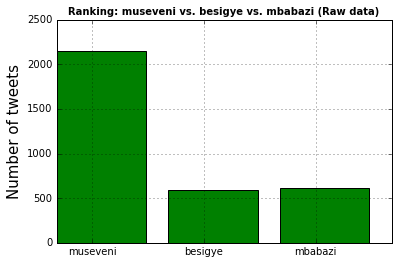

In [33]:
%matplotlib inline
prg_langs = ['museveni', 'besigye', 'mbabazi']
tweets_by_prg_lang = [tweets['museveni'].value_counts()[True], tweets['besigye'].value_counts()[True], tweets['mbabazi'].value_counts()[True]]

x_pos = list(range(len(prg_langs)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_prg_lang, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: museveni vs. besigye vs. mbabazi (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(prg_langs)
plt.grid()

In [36]:
negative_words = pd.read_table('negative-words.txt',encoding='latin-1')
positive_words = pd.read_table('positive-words.txt',encoding='latin-1')

In [37]:
print len(negative_words), len(positive_words)

SyntaxError: invalid syntax (<ipython-input-37-a470c5a4cab6>, line 1)

In [27]:
tweets.tail()

,text,lang,museveni,besigye,mbabazi
3460,RT @Jadwong: TRUMP JOKE: President Museveni no...,en,True,False,False
3461,"""@cobbo3: Police block Besigye, fire teargas &...",en,False,True,False
3462,Urge Ugandan President Museveni to pass the ac...,en,True,False,False
3463,Urge Ugandan President Museveni to pass the ac...,en,True,False,False
3464,RT @nbstv: President Museveni advises youth to...,en,True,False,False


In [29]:
def sentiment(text):
    for word in text:
        if word in negative_words:
            return "NEGATIVE"
        elif word in positive_words:
            return "POSITIVE"
        else:
            return "NEUTRAL"

In [30]:
tweets['sentiment']= tweets['text'].apply(sentiment)

In [33]:
tweets.sentiment.unique()

array(['NEUTRAL'], dtype=object)

In [34]:
import urllib

In [35]:
files=['negative.txt','positive.txt']
path='http://www.unc.edu/~ncaren/haphazard/'
for file_name in files:
    urllib.urlretrieve(path+file_name,file_name)

IOError: [Errno socket error] [Errno 101] Network is unreachable